# EDA


Los objetivos específicos se desarrollarán conforme se vaya realizando el análisis exploratorio de datos.

Importo librerias

In [1]:
import pandas as pd
import numpy as np
#import  requests
import io
from matplotlib import pyplot as plt
import seaborn as sns

Creo los dataframes

In [2]:
df_velocidad_prov = pd.read_csv('data\\velocidad_provincias.csv')
df_accesos_prov = pd.read_csv('data\provincias_acceso.csv')
df_accesos_nacional = pd.read_csv('data\\nacional_acceso.csv')
df_ingresos = pd.read_csv('data\ingresos_dolar.csv')

## DF *internet_rangos_vel_prov*

In [3]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [4]:
df_velocidad_prov

,Año,Trimestre,Provincia,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
0,2023,4,Buenos Aires,26909.000,23962.000,228393.000,239339.000,246144.000,110876.000,4042646.000,93351.000,5011620.000,158.490
1,2023,4,Capital Federal,516.000,4544.000,26409.000,48083.000,33925.000,5829.000,1355061.000,0.000,1474367.000,234.440
2,2023,4,Catamarca,71.000,209.000,3065.000,3734.000,4423.000,1827.000,61181.000,77.000,74587.000,89.400
3,2023,4,Chaco,236.000,477.000,14811.000,10361.000,6247.000,5729.000,105485.000,4040.000,147386.000,107.140
4,2023,4,Chubut,111.000,1088.000,44276.000,31402.000,22843.000,20196.000,33665.000,16589.000,170170.000,20.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,161.000,1625.000,24972.000,1.000,1.000,0.000,0.000,0.000,26760.000,3.316
956,2014,1,Santa Fe,8456.000,124468.000,345225.000,20328.000,6845.000,23.000,668.000,0.000,506013.000,3.147
957,2014,1,Santiago Del Estero,1234.000,10531.000,22817.000,2422.000,109.000,0.000,0.000,0.000,37113.000,2.949
958,2014,1,Tierra Del Fuego,12.000,607.000,30902.000,6.000,0.000,0.000,0.000,0.000,31527.000,3.447


In [5]:
df_velocidad_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   512kbps                 960 non-null    float64
 4   512kbps-1mbps           960 non-null    float64
 5   1mbps-6mbps             960 non-null    float64
 6   6mbps-10mbps            960 non-null    float64
 7   10mbps-20mbps           960 non-null    float64
 8   20mbps-30mbps           960 non-null    float64
 9   30mbps                  960 non-null    float64
 10  OTROS                   960 non-null    float64
 11  Total                   960 non-null    float64
 12  Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 97.6+ KB


In [6]:
df_velocidad_prov.describe()

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
count,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000
mean,2018.500,2.500,1986.276,9291.107,137188.509,38112.431,37303.289,20197.091,109885.055,6043.608,360007.367,21.616
std,2.874,1.119,12889.165,21018.938,328174.836,64565.359,89536.515,70534.758,434785.786,14503.711,774085.159,29.340
min,2014.000,1.000,6.000,0.000,1483.000,0.000,0.000,0.000,0.000,-1945.000,12406.000,2.574
25%,2016.000,1.750,40.750,347.250,24511.500,3581.000,2127.500,36.750,10.750,0.000,58824.000,4.685
50%,2018.500,2.500,107.000,2263.500,44254.000,12913.500,10082.000,1391.500,2418.500,58.000,109705.000,8.886
75%,2021.000,3.250,468.000,7227.500,84395.000,40126.000,26436.000,9858.750,35332.250,6485.250,188079.250,25.682
max,2023.000,4.000,238920.000,171244.480,2299705.320,403575.000,886678.000,949093.000,4042646.000,122762.000,5011620.000,234.440


El DataFrame muestra la cantidad de conexiones por categoría de velocidad de internet en diversas provincias de Argentina a lo largo de los años y trimestres. 

La mayor cantidad promedio de conexiones se ubica en el rango de velocidad *+ 1 Mbps - 6 Mbps*, y la menor en el rango de *Hasta 512 kbps*.

Se puede identificar las provincias con mayores accesos a los rangos de velocidades más rápidas.

Corrijo errores negativos de la columna Otros

In [7]:
df_velocidad_prov['OTROS'] = df_velocidad_prov['OTROS'].replace(-1945.000,1945.000)
df_velocidad_prov['OTROS'] = df_velocidad_prov['OTROS'].replace(-1,1000)

In [8]:
df_velocidad_prov.describe()

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
count,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000
mean,2018.500,2.500,1986.276,9291.107,137188.509,38112.431,37303.289,20197.091,109885.055,6048.703,360007.367,21.616
std,2.874,1.119,12889.165,21018.938,328174.836,64565.359,89536.515,70534.758,434785.786,14501.621,774085.159,29.340
min,2014.000,1.000,6.000,0.000,1483.000,0.000,0.000,0.000,0.000,0.000,12406.000,2.574
25%,2016.000,1.750,40.750,347.250,24511.500,3581.000,2127.500,36.750,10.750,0.000,58824.000,4.685
50%,2018.500,2.500,107.000,2263.500,44254.000,12913.500,10082.000,1391.500,2418.500,84.500,109705.000,8.886
75%,2021.000,3.250,468.000,7227.500,84395.000,40126.000,26436.000,9858.750,35332.250,6485.250,188079.250,25.682
max,2023.000,4.000,238920.000,171244.480,2299705.320,403575.000,886678.000,949093.000,4042646.000,122762.000,5011620.000,234.440


Analizamos los datos outliers o registros atipicos de la columna Mbps (Media de bajada) para reconocer que provincias poseen mayores velocidades. Para eso busco Outliers

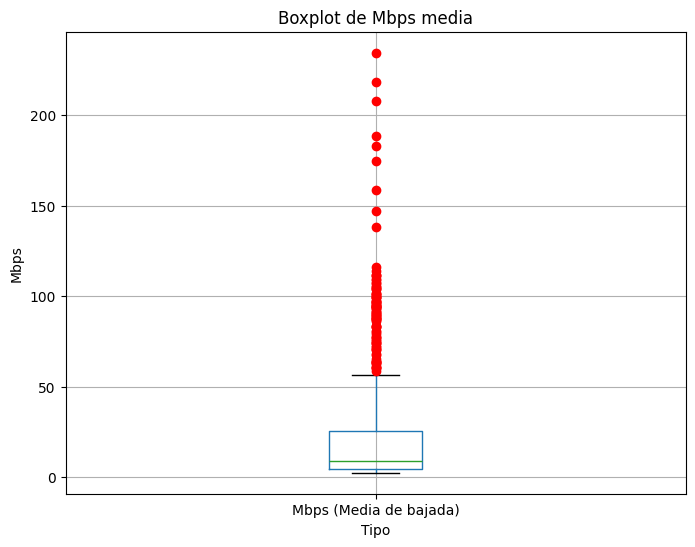

In [9]:
plt.figure(figsize=(8,6))
df_velocidad_prov.boxplot(column=['Mbps (Media de bajada)'], sym='ro')
plt.title('Boxplot de Mbps media')
plt.xlabel('Tipo')
plt.ylabel('Mbps')

plt.show()

Existen muchos outliers, estos se revisaran a continuación

In [10]:
data = df_velocidad_prov[['Mbps (Media de bajada)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_velocidad_prov[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
0,2023,4,Buenos Aires,26909.000,23962.000,228393.000,239339.000,246144.000,110876.000,4042646.000,93351.000,5011620.000,158.490
1,2023,4,Capital Federal,516.000,4544.000,26409.000,48083.000,33925.000,5829.000,1355061.000,0.000,1474367.000,234.440
2,2023,4,Catamarca,71.000,209.000,3065.000,3734.000,4423.000,1827.000,61181.000,77.000,74587.000,89.400
3,2023,4,Chaco,236.000,477.000,14811.000,10361.000,6247.000,5729.000,105485.000,4040.000,147386.000,107.140
5,2023,4,Córdoba,99.000,8404.000,117068.000,91169.000,51126.000,26948.000,767427.000,17061.000,1079302.000,114.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2021,1,Capital Federal,135.000,244.000,159662.000,76753.000,56457.000,83255.000,1003041.000,126.000,1379673.000,68.290
289,2020,4,Capital Federal,135.000,244.000,160210.000,78123.000,60208.000,80269.000,1000073.000,268.000,1379530.000,67.325
313,2020,3,Capital Federal,264.000,312.000,162222.000,85083.000,68753.000,78028.000,977766.000,247.000,1372675.000,63.809
337,2020,2,Capital Federal,264.000,312.000,166474.000,94585.000,79858.000,80160.000,935481.000,687.000,1357821.000,60.484


Quiero ver que valores se repiten mas

In [11]:
conteo = registros_con_outliers['Provincia'].value_counts()
conteo

Provincia
Capital Federal    16
Buenos Aires        9
Catamarca           6
Chaco               5
Córdoba             5
Corrientes          5
Entre Ríos          5
Formosa             5
La Rioja            5
Misiones            5
Neuquén             5
Río Negro           5
Salta               5
Santa Fe            5
Tucumán             5
San Luis            3
Name: count, dtype: int64

Puedo ver que los valores que mas se repiten son Capital Federal 16, Buenos Aires 9, Catamarca  6

## **df_accesos_prov**

In [12]:
df_accesos_prov

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2023,4,Buenos Aires,223391.000,2797700.000,1784593.000,137993.000,67943.000,5005720,5900.000,80.960,27.680
1,2023,4,Capital Federal,58700.000,1198835.000,182520.000,4492.000,29820.000,1472317,2050.000,117.020,47.800
2,2023,4,Catamarca,6669.000,11016.000,55437.000,1384.000,81.000,74586,1.000,68.630,17.460
3,2023,4,Chaco,14000.000,60277.000,62301.000,8404.000,2404.000,147381,5.000,44.350,11.850
4,2023,4,Chubut,26306.000,77217.000,26174.000,30543.000,9930.000,169313,857.000,84.960,26.040
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927.000,100.000,381.000,4092.000,3264.000,26304,460.000,28.939,8.677
956,2014,1,Santa Fe,322662.000,174296.000,3059.000,5951.000,644.000,506000,612.000,47.848,15.078
957,2014,1,Santiago Del Estero,32567.000,3598.000,19.000,915.000,34.000,37124,9.000,16.310,4.059
958,2014,1,Tierra Del Fuego,21618.000,2837.000,648.000,1.000,2934.000,27272,766.000,63.966,19.105


In [13]:
df_accesos_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   ADSL                          960 non-null    float64
 4   Cablemodem                    960 non-null    float64
 5   Fibra óptica                  960 non-null    float64
 6   Wireless                      960 non-null    float64
 7   Otros                         960 non-null    float64
 8   Banda ancha fija              960 non-null    int64  
 9   Dial up                       960 non-null    float64
 10  Accesos por cada 100 hogares  960 non-null    float64
 11  Accesos por cada 100 hab      960 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 90.1+ KB


In [14]:
df_accesos_prov.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000
mean,2018.500,2.500,117100.738,181634.991,44282.124,12071.288,6451.997,360625.509,915.627,51.662,15.394
std,2.874,1.119,241102.558,446105.747,168154.555,20544.308,11192.518,776137.445,2309.443,23.898,9.169
min,2014.000,1.000,3296.000,0.000,0.000,0.000,2.000,12193.000,0.000,9.347,2.685
25%,2016.000,1.750,21230.250,10544.500,347.000,676.000,330.000,58923.250,5.000,32.857,8.764
50%,2018.500,2.500,45475.500,39670.000,2541.000,4947.000,1881.000,110473.500,137.000,48.817,13.417
75%,2021.000,3.250,91905.000,75493.250,23476.750,13694.250,7278.750,188350.250,618.250,65.117,19.658
max,2023.000,4.000,1586343.000,2797700.000,1784593.000,138405.000,73415.000,5005720.000,15229.000,124.061,52.237


En este dataframe se muestra la cantidad de conexiones a internet por tecnología y Banda Ancha / Dial up en las diferentes provincias de Argentina a lo largo de los años y trimestres.

*Cable Modem* y ADSL parecen tener la mayor cantidad de accesos, mientras *Otros* y *Wireless* , parecen tener la menor cantidad
De acuerdo al promedio, *Banda ancha* supera en gran medida a *Dial Up*.


A continuacion revisare unas graficas de penetracion hogares y habitantes

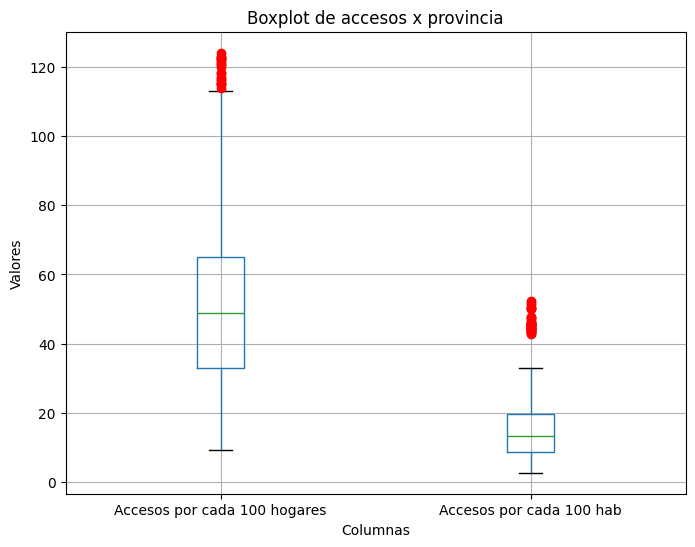

In [15]:
plt.figure(figsize=(8,6))
df_accesos_prov.boxplot(column=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'], sym='ro')
plt.title('Boxplot de accesos x provincia')
plt.xlabel('Columnas')
plt.ylabel('Valores')

plt.show()

Encuentro muchos valores atipicos o fuera del rango intercuartil
 
Procedoa investigar los registros con dichos valores.

In [16]:
data = df_accesos_prov[['Accesos por cada 100 hogares']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_prov[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab
1,2023,4,Capital Federal,58700.000,1198835.000,182520.000,4492.000,29820.000,1472317,2050.000,117.020,47.800
25,2023,3,Capital Federal,60765.000,1205339.000,167428.000,4629.000,29823.000,1465934,2050.000,116.400,47.600
49,2023,2,Capital Federal,68348.000,1218631.000,136295.000,4504.000,29900.000,1455578,2100.000,115.480,47.270
73,2023,1,Capital Federal,132149.000,1223930.000,156222.000,4605.000,31823.000,1546584,2145.000,122.590,50.230
97,2022,4,Capital Federal,138753.000,1238196.000,138548.000,4603.000,31826.000,1549781,2145.000,122.730,50.350
121,2022,3,Capital Federal,140791.000,1240125.000,129218.000,5758.000,31787.000,1545534,2145.000,122.280,50.220
145,2022,2,Capital Federal,145491.000,1232226.000,121506.000,5757.000,31791.000,1534626,2145.000,121.310,49.874
577,2017,4,Capital Federal,571363.000,961688.000,36277.000,3119.000,9877.000,1575418,6906.000,122.897,51.617
601,2017,3,Capital Federal,583249.000,941092.000,33481.000,2814.000,9723.000,1563289,7070.000,121.858,51.244
625,2017,2,Capital Federal,615262.000,932466.000,38628.000,2819.000,11016.000,1592175,8016.000,124.061,52.237


Podemos notar que todos los outliers son de capital federal para Accesos por cada 100 hogares

In [17]:
data = df_accesos_prov[['Accesos por cada 100 hab']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_accesos_prov[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab
1,2023,4,Capital Federal,58700.000,1198835.000,182520.000,4492.000,29820.000,1472317,2050.000,117.020,47.800
25,2023,3,Capital Federal,60765.000,1205339.000,167428.000,4629.000,29823.000,1465934,2050.000,116.400,47.600
49,2023,2,Capital Federal,68348.000,1218631.000,136295.000,4504.000,29900.000,1455578,2100.000,115.480,47.270
73,2023,1,Capital Federal,132149.000,1223930.000,156222.000,4605.000,31823.000,1546584,2145.000,122.590,50.230
97,2022,4,Capital Federal,138753.000,1238196.000,138548.000,4603.000,31826.000,1549781,2145.000,122.730,50.350
121,2022,3,Capital Federal,140791.000,1240125.000,129218.000,5758.000,31787.000,1545534,2145.000,122.280,50.220
145,2022,2,Capital Federal,145491.000,1232226.000,121506.000,5757.000,31791.000,1534626,2145.000,121.310,49.874
169,2022,1,Capital Federal,102290.000,1217225.000,62308.000,5784.000,29934.000,1415378,2163.000,111.798,46.014
193,2021,4,Capital Federal,111360.000,1205128.000,60005.000,5679.000,29947.000,1409935,2184.000,111.270,45.849
217,2021,3,Capital Federal,142902.000,1192107.000,42966.000,6059.000,29371.000,1411797,1608.000,111.271,45.900


Igual que la anterior columna, vemos que todos los registros pertenecen a Capital Federal en la columna 'Accesos por cada 100 hab', pudiendo concluir que en la provincia existe por mucho un gran acceso y demanda de servicio de internet.


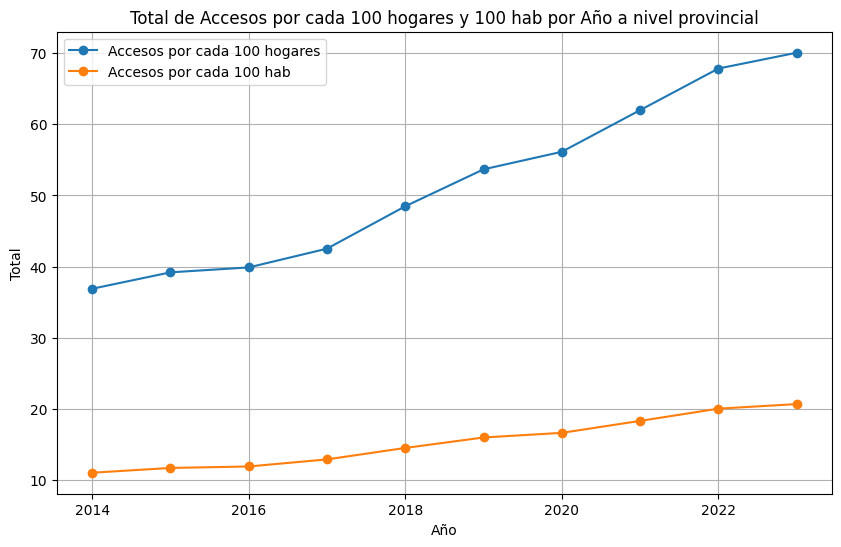

In [18]:
promedio_por_anio = df_accesos_prov.groupby('Año').agg({'Accesos por cada 100 hogares': 'mean', 'Accesos por cada 100 hab': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')

plt.title('Total de Accesos por cada 100 hogares y 100 hab por Año a nivel provincial')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

Se observa un gran crecimiento entre los años 2014 y 2022, siendo en 2016 una gran aceleracion en cuanto acceso cada 100 hogares.
Al parecido sucede con respecto al acceso cada 100 habitantes, aunquie esta diferencia no esta tan marcada

Analicemos un grafico de barras para ver la distribucion de acceso cada 100 habitantes y 100 hogares a nivel provincial

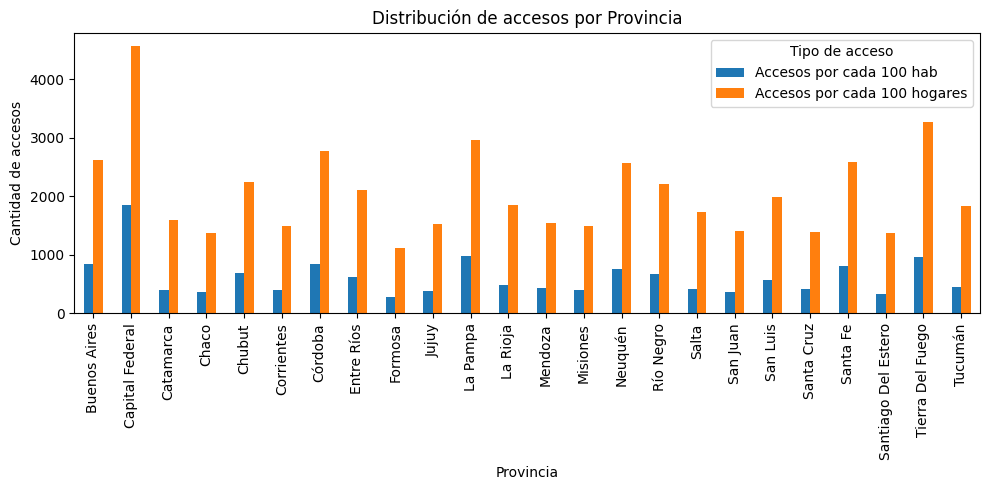

In [19]:
selected_columns = df_accesos_prov[['Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Provincia']]

grouped = selected_columns.groupby("Provincia").sum()

ax = grouped.plot(kind='bar', stacked=False, figsize=(10,5))

# Personalización del gráfico
plt.title('Distribución de accesos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de accesos')
plt.legend(title='Tipo de acceso')
plt.tight_layout()


Veamos los datos a nivel Nacional

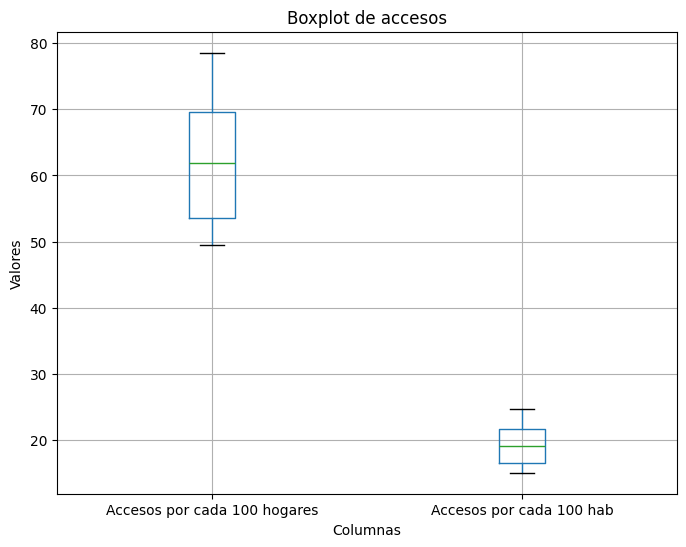

In [20]:
plt.figure(figsize=(8,6))
df_accesos_nacional.boxplot(column=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'], sym='ro')
plt.title('Boxplot de accesos')
plt.xlabel('Columnas')
plt.ylabel('Valores')

plt.show()

No hay valores outliers, lo cual tendria sentido ya que hablamos a nivel nacional

Anlicemos el comportamiento de las metricas a lo largo del tiempo

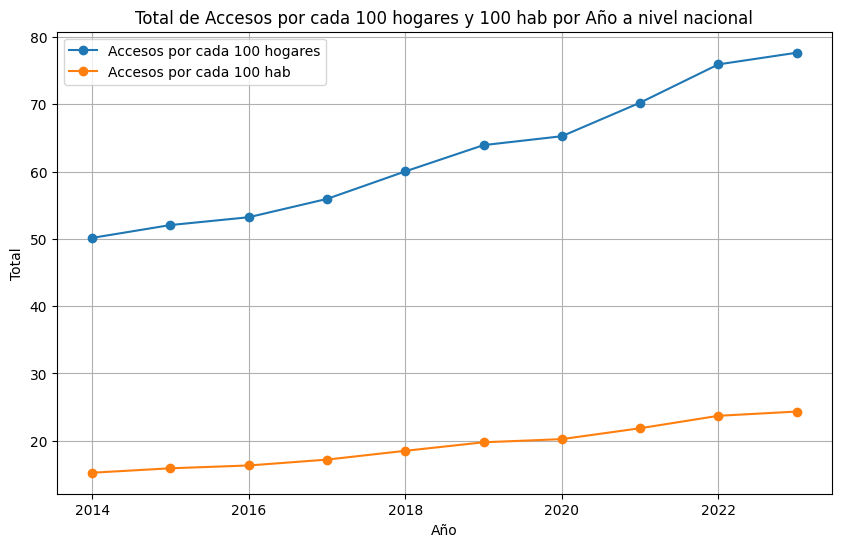

In [21]:
promedio_por_anio = df_accesos_nacional.groupby('Año').agg({'Accesos por cada 100 hogares': 'mean', 'Accesos por cada 100 hab': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hogares'], label='Accesos por cada 100 hogares', marker='o')
plt.plot(promedio_por_anio.index, promedio_por_anio['Accesos por cada 100 hab'], label='Accesos por cada 100 hab', marker='o')

plt.title('Total de Accesos por cada 100 hogares y 100 hab por Año a nivel nacional')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

Podemos notar el crecimiento de la penetracion de internet a traves de los años, principalmente entre 2018 y 2023

KPI

Segun lo observado a lo alrgo de EDA, he podido notar ciertas tendencias, por lo que opte en trabajar en ver un aumento de un 1,5% en el acceso al servicio internet para el proximo trimestre cada 100 hogares 

In [22]:
df_crecimiento = df_accesos_prov.copy()


Creo una funcion para contar los trimestres

In [23]:
def get_trimestre_count(trimestre,anio):
  return trimestre+4*(int(anio)-df_crecimiento["Año"].min())

In [24]:
df_crecimiento["TrimestreCount"] = df_crecimiento.apply(lambda r:get_trimestre_count(r["Trimestre"],r["Año"]),axis=1)
df_crecimiento

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreCount
0,2023,4,Buenos Aires,223391.000,2797700.000,1784593.000,137993.000,67943.000,5005720,5900.000,80.960,27.680,40
1,2023,4,Capital Federal,58700.000,1198835.000,182520.000,4492.000,29820.000,1472317,2050.000,117.020,47.800,40
2,2023,4,Catamarca,6669.000,11016.000,55437.000,1384.000,81.000,74586,1.000,68.630,17.460,40
3,2023,4,Chaco,14000.000,60277.000,62301.000,8404.000,2404.000,147381,5.000,44.350,11.850,40
4,2023,4,Chubut,26306.000,77217.000,26174.000,30543.000,9930.000,169313,857.000,84.960,26.040,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927.000,100.000,381.000,4092.000,3264.000,26304,460.000,28.939,8.677,1
956,2014,1,Santa Fe,322662.000,174296.000,3059.000,5951.000,644.000,506000,612.000,47.848,15.078,1
957,2014,1,Santiago Del Estero,32567.000,3598.000,19.000,915.000,34.000,37124,9.000,16.310,4.059,1
958,2014,1,Tierra Del Fuego,21618.000,2837.000,648.000,1.000,2934.000,27272,766.000,63.966,19.105,1


In [25]:
df_crecimiento["porcentaje crecimiento"] = df_crecimiento.sort_values("TrimestreCount").groupby("Provincia")["Accesos por cada 100 hogares"].transform("diff")
df_crecimiento["porcentaje crecimiento"] = df_crecimiento["porcentaje crecimiento"].replace(np.nan,0)
df_crecimiento["porcentaje crecimiento"] = df_crecimiento["porcentaje crecimiento"] / df_crecimiento["Accesos por cada 100 hogares"].apply(lambda v:max(v,1))

df_crecimiento

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreCount,kpi
0,2023,4,Buenos Aires,223391.000,2797700.000,1784593.000,137993.000,67943.000,5005720,5900.000,80.960,27.680,40,0.004
1,2023,4,Capital Federal,58700.000,1198835.000,182520.000,4492.000,29820.000,1472317,2050.000,117.020,47.800,40,0.005
2,2023,4,Catamarca,6669.000,11016.000,55437.000,1384.000,81.000,74586,1.000,68.630,17.460,40,0.001
3,2023,4,Chaco,14000.000,60277.000,62301.000,8404.000,2404.000,147381,5.000,44.350,11.850,40,0.033
4,2023,4,Chubut,26306.000,77217.000,26174.000,30543.000,9930.000,169313,857.000,84.960,26.040,40,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927.000,100.000,381.000,4092.000,3264.000,26304,460.000,28.939,8.677,1,0.000
956,2014,1,Santa Fe,322662.000,174296.000,3059.000,5951.000,644.000,506000,612.000,47.848,15.078,1,0.000
957,2014,1,Santiago Del Estero,32567.000,3598.000,19.000,915.000,34.000,37124,9.000,16.310,4.059,1,0.000
958,2014,1,Tierra Del Fuego,21618.000,2837.000,648.000,1.000,2934.000,27272,766.000,63.966,19.105,1,0.000


In [26]:
df_crecimiento[df_crecimiento["Provincia"]=="Buenos Aires"].head(10)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreCount,kpi
0,2023,4,Buenos Aires,223391.000,2797700.000,1784593.000,137993.000,67943.000,5005720,5900.000,80.960,27.680,40,0.004
24,2023,3,Buenos Aires,237705.000,2784175.000,1740239.000,137921.000,68197.000,4962337,5900.000,80.640,27.500,39,0.012
48,2023,2,Buenos Aires,265537.000,2766463.000,1645945.000,138405.000,69138.000,4879442,6046.000,79.670,27.100,38,0.008
72,2023,1,Buenos Aires,304583.000,2761043.000,1551074.000,132458.000,71770.000,4814729,6199.000,79.000,26.810,37,0.001
96,2022,4,Buenos Aires,325908.000,2767247.000,1499149.000,129910.000,72451.000,4788466,6199.000,78.940,26.720,36,0.011
120,2022,3,Buenos Aires,339648.000,2748325.000,1436433.000,126846.000,70416.000,4715469,6199.000,78.110,26.370,35,0.007
144,2022,2,Buenos Aires,350652.000,2719613.000,1399043.000,126847.000,71028.000,4660984,6199.000,77.580,26.129,34,0.019
168,2022,1,Buenos Aires,392045.000,2728865.000,1242121.000,125521.000,66872.000,4549131,6293.000,76.078,25.563,33,0.005
192,2021,4,Buenos Aires,426325.000,2706506.000,1176024.000,126887.000,73415.000,4502772,6385.000,75.664,25.363,32,0.053
216,2021,3,Buenos Aires,585729.000,2595485.000,885613.000,120228.000,64554.000,4246425,5184.000,71.682,23.970,31,0.023


## KPI PROPUESTO:

Aumentar al menos un 1,5% en el acceso al servicio internet para el proximo trimestre, comparado con el ultimo, cada 100 hogares, por provincia. 

# KPI en wireless

Se quiere alcanzar mayor tecnologia en otras zonas enfocandose en la tecnologia wireless y buscandoo la oportunidad de negocio

In [27]:
df_crecimiento_wireless = df_accesos_prov.copy()
df_crecimiento_wireless = df_crecimiento_wireless.drop(["ADSL","Cablemodem","Fibra óptica","Otros","Banda ancha fija","Dial up"],axis=1)
df_crecimiento_wireless["Provincia"] = df_crecimiento_wireless["Provincia"].str.upper()
df_crecimiento_wireless = df_crecimiento_wireless.dropna()
df_crecimiento_wireless

,Año,Trimestre,Provincia,Wireless,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2023,4,BUENOS AIRES,137993.000,80.960,27.680
1,2023,4,CAPITAL FEDERAL,4492.000,117.020,47.800
2,2023,4,CATAMARCA,1384.000,68.630,17.460
3,2023,4,CHACO,8404.000,44.350,11.850
4,2023,4,CHUBUT,30543.000,84.960,26.040
...,...,...,...,...,...,...
955,2014,1,SANTA CRUZ,4092.000,28.939,8.677
956,2014,1,SANTA FE,5951.000,47.848,15.078
957,2014,1,SANTIAGO DEL ESTERO,915.000,16.310,4.059
958,2014,1,TIERRA DEL FUEGO,1.000,63.966,19.105


In [28]:
df_crecimiento_wireless["TrimestreCount"] = df_crecimiento_wireless.apply(lambda r:get_trimestre_count(r["Trimestre"],r["Año"]),axis=1)
df_crecimiento_wireless

,Año,Trimestre,Provincia,Wireless,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreCount
0,2023,4,BUENOS AIRES,137993.000,80.960,27.680,40
1,2023,4,CAPITAL FEDERAL,4492.000,117.020,47.800,40
2,2023,4,CATAMARCA,1384.000,68.630,17.460,40
3,2023,4,CHACO,8404.000,44.350,11.850,40
4,2023,4,CHUBUT,30543.000,84.960,26.040,40
...,...,...,...,...,...,...,...
955,2014,1,SANTA CRUZ,4092.000,28.939,8.677,1
956,2014,1,SANTA FE,5951.000,47.848,15.078,1
957,2014,1,SANTIAGO DEL ESTERO,915.000,16.310,4.059,1
958,2014,1,TIERRA DEL FUEGO,1.000,63.966,19.105,1


In [29]:
df_crecimiento_wireless["porcentaje crecimeinto"] = df_crecimiento_wireless.sort_values("TrimestreCount").groupby("Provincia")["Wireless"].transform("diff")
df_crecimiento_wireless["porcentaje crecimiento"] = df_crecimiento_wireless["porcentaje crecimiento"].replace(np.nan,0)
df_crecimiento_wireless["porcentaje crecimiento"] = df_crecimiento_wireless["porcentaje crecimiento"] / df_crecimiento_wireless["Wireless"].apply(lambda v:max(v,1))

df_crecimiento_wireless

,Año,Trimestre,Provincia,Wireless,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreCount,kpi
0,2023,4,BUENOS AIRES,137993.000,80.960,27.680,40,0.001
1,2023,4,CAPITAL FEDERAL,4492.000,117.020,47.800,40,-0.030
2,2023,4,CATAMARCA,1384.000,68.630,17.460,40,0.000
3,2023,4,CHACO,8404.000,44.350,11.850,40,0.016
4,2023,4,CHUBUT,30543.000,84.960,26.040,40,0.001
...,...,...,...,...,...,...,...,...
955,2014,1,SANTA CRUZ,4092.000,28.939,8.677,1,0.000
956,2014,1,SANTA FE,5951.000,47.848,15.078,1,0.000
957,2014,1,SANTIAGO DEL ESTERO,915.000,16.310,4.059,1,0.000
958,2014,1,TIERRA DEL FUEGO,1.000,63.966,19.105,1,0.000


Filtro mis datos desde el 2018 para ver la tendencia

In [54]:
df_filtrado = df_crecimiento_wireless[df_crecimiento_wireless['Año'] >= 2019]

Reviso el comportamiento

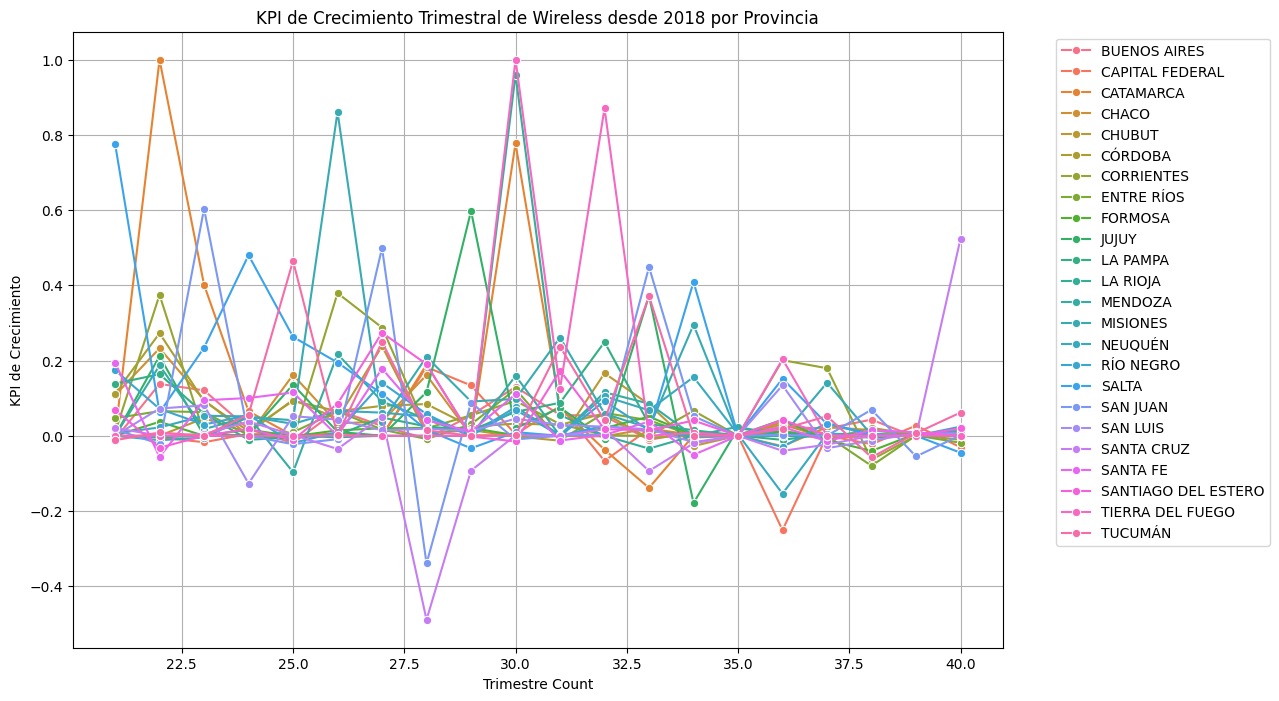

In [55]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_filtrado, x='TrimestreCount', y='kpi', hue='Provincia', marker='o')
plt.title('KPI de Crecimiento Trimestral de Wireless desde 2018 por Provincia')
plt.xlabel('Trimestre Count')
plt.ylabel('KPI de Crecimiento')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## KPI PROPUESTO: crecimiento en Santa Cruz
Se observa un gran crecimiento en Santa Cruz de los ultimos trimestres por lo que se propone un aumento del crecimiento del 10% de la tecnologia wireless en la provincia de Santa Cruz, para el proximo trimestre, comparado con el anterior, viendo una oportunidad de negocio

## KPI INGRESOS

In [32]:
df_ingresos

,Año,Trimestre,Ingresos (miles de pesos),Valor_dolar,Ingresos en USD
0,2023,4,167376014.800,940.000,178059.590
1,2023,3,133106593.410,691.667,192443.268
2,2023,2,118060280.280,481.833,245023.065
3,2023,1,104134992.810,381.667,272842.776
4,2022,4,72443482.989,314.667,230222.933
5,2022,3,64086784.331,289.167,221625.767
6,2022,2,60419500.623,213.667,282774.574
7,2022,1,55219313.015,206.500,267405.874
8,2021,4,45467887.165,200.833,226396.119
9,2021,3,42999944.293,181.333,237132.046


Quiero analizar la tendencia en cuanto al comportamiento del sector ingresos a nivel Nacional de internet

In [33]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        40 non-null     int64  
 1   Trimestre                  40 non-null     int64  
 2   Ingresos (miles de pesos)  40 non-null     float64
 3   Valor_dolar                40 non-null     float64
 4   Ingresos en USD            40 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.7 KB


In [34]:
df_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos),Valor_dolar,Ingresos en USD
count,40.000,40.000,40.000,40.000,40.000
mean,2018.500,2.500,32811526.002,131.731,357127.583
std,2.909,1.132,38503038.835,197.437,129880.311
min,2014.000,1.000,2984054.209,11.363,178059.590
25%,2016.000,1.750,6817891.304,15.490,245809.761
50%,2018.500,2.500,18422550.180,38.632,336703.071
75%,2021.000,3.250,39429736.048,166.333,445428.552
max,2023.000,4.000,167376014.800,940.000,648946.916


In [35]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Valor_dolar,Ingresos en USD
0,2023,4,167376014.800,940.000,178059.590
1,2023,3,133106593.410,691.667,192443.268
2,2023,2,118060280.280,481.833,245023.065
3,2023,1,104134992.810,381.667,272842.776
4,2022,4,72443482.989,314.667,230222.933


opto por trabajar con el precio en usd solamente, por lo que borro ingresos en pesos

In [36]:
df_ingresos.drop(columns='Ingresos (miles de pesos)', inplace=True)

Analizando un poco veo que existe un incremento entre los cuartiles. Analizo el comportamiento del sector de manera temporal

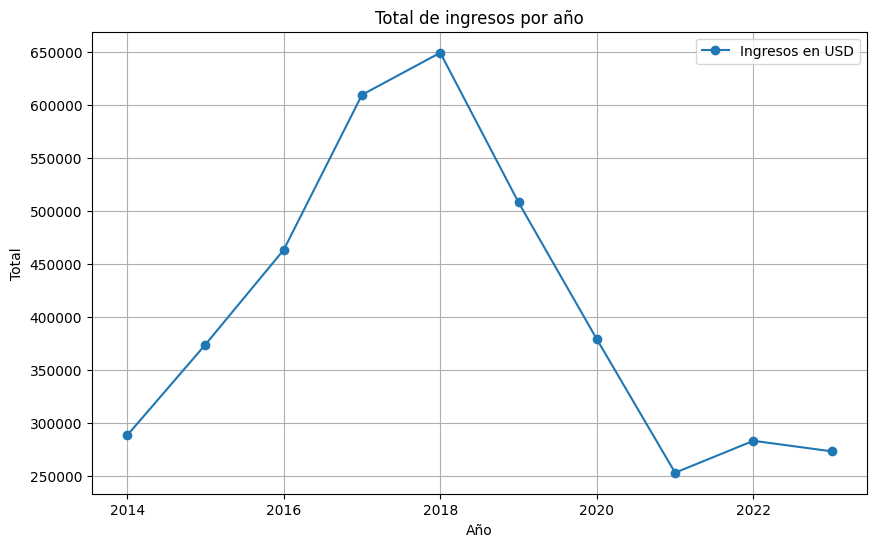

In [37]:
promedio_por_anio = df_ingresos.groupby('Año').agg({'Ingresos en USD':'max'})

plt.figure(figsize=(10, 6))
plt.plot(promedio_por_anio.index, promedio_por_anio['Ingresos en USD'], label='Ingresos en USD', marker='o')

plt.title('Total de ingresos por año')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

Se puede oobservar una baja en los ingresos entre los años 2018-2023, luego de una gran subida desde el 2014-2018. Siendo este un valor real, teniendo en cuenta los datos de inflacion segun la cotizacion del dolar oficial, una realidad de Argentina

## KPI PROPUESTO PARA INGRESOS

Aumentar un 0,2% los datos de ingresos para el proximo año, comparado con el año 2023

In [38]:
df_ingresos["TrimestreCount"] =df_ingresos.apply(lambda r:get_trimestre_count(r["Trimestre"],r["Año"]),axis=1)
df_ingresos

,Año,Trimestre,Valor_dolar,Ingresos en USD,TrimestreCount
0,2023,4,940.000,178059.590,40.000
1,2023,3,691.667,192443.268,39.000
2,2023,2,481.833,245023.065,38.000
3,2023,1,381.667,272842.776,37.000
4,2022,4,314.667,230222.933,36.000
5,2022,3,289.167,221625.767,35.000
6,2022,2,213.667,282774.574,34.000
7,2022,1,206.500,267405.874,33.000
8,2021,4,200.833,226396.119,32.000
9,2021,3,181.333,237132.046,31.000


Reordeno el df

In [ ]:
df_ingresos.sort_values(by='TrimestreCount', inplace=True)

In [51]:
df_ingresos['Crecimiento Trimestral (%)'] = df_ingresos['Ingresos en USD'].pct_change() * 100


In [50]:
df_ingresos

,Año,Trimestre,Valor_dolar,Ingresos en USD,TrimestreCount,Crecimiento Trimestral (%)
39,2014,1,11.533,258733.024,1.000,NaN
38,2014,2,11.363,287839.502,2.000,11.250
37,2014,3,14.137,246071.993,3.000,-14.511
36,2014,4,13.783,286609.972,4.000,16.474
35,2015,1,13.053,373573.952,5.000,30.342
34,2015,2,12.893,364668.360,6.000,-2.384
33,2015,3,15.440,333791.379,7.000,-8.467
32,2015,4,14.907,360704.330,8.000,8.063
31,2016,1,15.023,395174.943,9.000,9.556
30,2016,2,14.673,445313.989,10.000,12.688


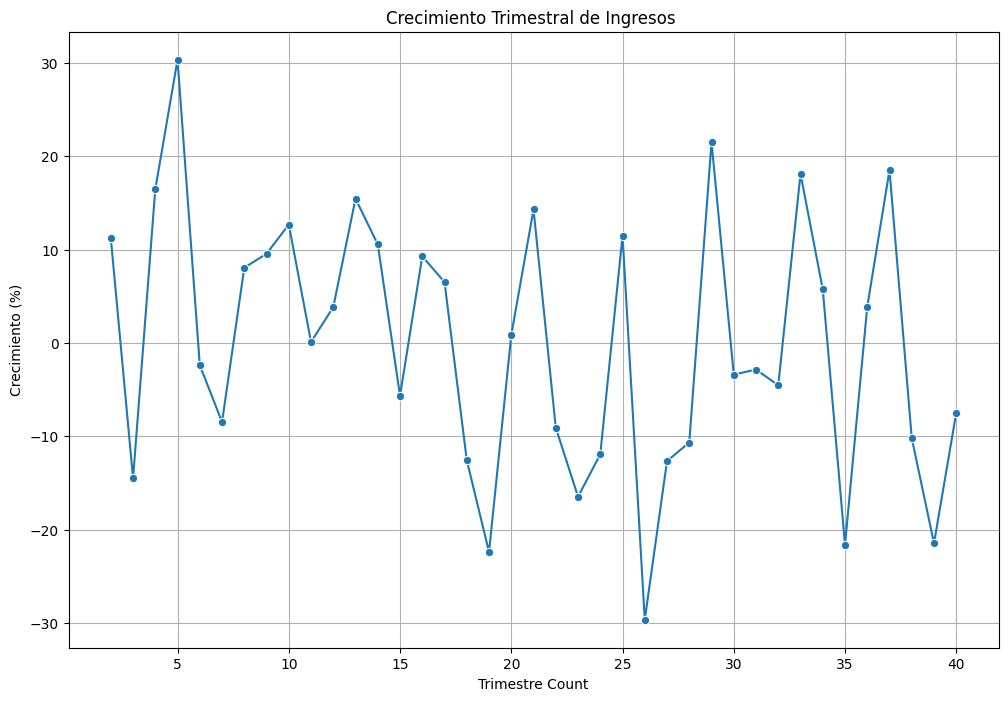

In [53]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_ingresos, x='TrimestreCount', y='Crecimiento Trimestral (%)', marker='o')
plt.title('Crecimiento Trimestral de Ingresos ')
plt.xlabel('Trimestre Count')
plt.ylabel('Crecimiento (%)')
plt.grid(True)
plt.show()


Puedo observar un pequeño comportamiento de crecimiento en los ultimos trimestres.

Por esto decido plantear el KPI en el calculo un incremento de los ingresos del proximo trimestre del año 2024
Siendo que haya un aumento del 0.2% en el proximo trimestre comparado con su antecesor.